## 分形曲线之脑分形曲线_std
见py文件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
from time import sleep
from matplotlib.animation import FuncAnimation
import random
a=[[0.03,0,0,0.45,0,0,0.05],[-0.03,0,0,-0.45,0,0.4,0.15],[0.56,-0.56,0.56,0.56,0,0.4,0.4],[0.56,0.56,-0.56,0.56,0,0.4,0.4]]
x0=0;y0=0
x = []
y = []
num = 10000
for i in range(num):
    r = random.random()
    if r<=0.05:
        x1=a[0][0]*x0+a[0][1]*y0+a[0][4]
        y1=a[0][2]*x0+a[0][3]*y0+a[0][5]
    if 0.05<r<=0.2:
        x1=a[1][0]*x0+a[1][1]*y0+a[1][4]
        y1=a[1][2]*x0+a[1][3]*y0+a[1][5]
    if 0.2<r<=0.6:
        x1=a[2][0]*x0+a[2][1]*y0+a[2][4]
        y1=a[2][2]*x0+a[2][3]*y0+a[2][5]
    if 0.6<r<=1:
        x1=a[3][0]*x0+a[3][1]*y0+a[3][4]
        y1=a[3][2]*x0+a[3][3]*y0+a[3][5]
    x0=x1;y0=y1
    x.append(x1)
    y.append(y1)
c = [float(random.randint(1,20)) for i in range(num)]

C:\Users\wwwwww931121\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\wwwwww931121\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


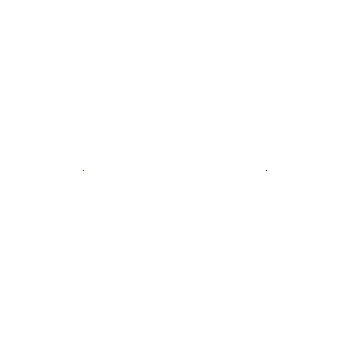

In [2]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(121)
plt.axis("equal")
plt.axis("off")
ax = plt.subplot(122)
plt.axis("equal")
plt.axis("off")
pool_size = 2

control = [0,0]
runtime_data = [[[],[],[]],[[],[],[]]]
xlen = len(x)
def animate(_):
    for i in range(pool_size):
        # print(control[i])

        runtime_data[i] = [x[0:control[i]+1],y[0:control[i]+1],c[0:control[i]+1]]
            # print(3,i,len(runtime_data[i][0]),len(runtime_data[i][1]))
        # print(4,i,len(runtime_data[i][0]),len(runtime_data[i][1]))
        if i==0:
            ax = plt.subplot(121)
            # print(5,i,len(runtime_data[i][0]),len(runtime_data[i][1]))
            scatt = plt.scatter(runtime_data[i][0], runtime_data[i][1], s=1, c="b", marker="s", linewidths=0)
        else:
            ax = plt.subplot(122)
            scatt = plt.scatter(runtime_data[i][0], runtime_data[i][1], s=1,c = runtime_data[i][2], marker="s", linewidths=0)
    ax.figure.canvas.draw()
    return scatt,
ani = FuncAnimation(fig, animate, interval=2, blit=True, repeat=False)
def dataUpdate_thead(i):
    while True:
        # print(i)
        control[i] = (control[i]+1)%xlen
        sleep(0.0001)
ad_rdy_ev = threading.Event()
ad_rdy_ev.set()  # 设置线程运行
for i in range(pool_size):
    ti = threading.Thread(target=dataUpdate_thead, args=(i,))
    ti.daemon = True
    ti.start()

plt.show()